In [1]:
import sys
sys.path.append("../")
from IPython.display import display

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rc('text', usetex=False)
import matplotlib.pyplot as plt

import joblib
import numpy as np
import pandas as pd

from rsep_explain.variables import auto_var

In [43]:
def get_bbm_decision_df(ds_name, rsep=0., seed=0):
    df = pd.read_csv(f"../rsep_explain/datasets/risk_dsets/{ds_name}_data.csv")
    feature_names = df.columns.values.tolist()

    #res = joblib.load(f"../results/lin_sep_bbm_3/risk_{ds_name}-rminmax-0.pkl")
    res = joblib.load(f"../results/lin_sep_bbm_rob_3/risk_{ds_name}-rminmax-{seed}-{rsep}.pkl")

    risk_scores = {}
    for fet_id, val in res['bbm_results']['learned_model']:
        key = f"{feature_names[fet_id]} $\geq$ {val}"
        risk_scores[key] = risk_scores.setdefault(key, 0) + 1

    return pd.DataFrame.from_dict(risk_scores, orient='index')

In [10]:
ds_name = "careval"
df = pd.read_csv(f"../rsep_explain/datasets/risk_dsets/{ds_name}_data.csv")
feature_names = df.columns.values.tolist()

In [8]:
feature_names

['class_1',
 'a1_high',
 'a1_low',
 'a1_med',
 'a2_high',
 'a2_low',
 'a2_med',
 'a3_2',
 'a3_3',
 'a3_4',
 'a4_2',
 'a4_4',
 'a5_big',
 'a5_med',
 'a6_high',
 'a6_low']

In [45]:
#df = get_bbm_decision_df("careval")
df = get_bbm_decision_df("bank", rsep=0.05, seed=1)
print(df.to_latex(column_format="lc").replace(">", "$\geq$"))
df

\begin{tabular}{lc}
\toprule
{} &  0 \\
\midrule
calls\_b4\_campaign\_successful \$\textbackslash geq\$ 0.5 &  5 \\
called\_before \$\textbackslash geq\$ 0.5                &  4 \\
cons\_price\_idx\_geq\_93\_5 \$\textbackslash geq\$ 0.5      &  2 \\
has\_housing\_loan \$\textbackslash geq\$ 0.5             &  1 \\
call\_in\_Q3 \$\textbackslash geq\$ 0.5                   &  1 \\
married \$\textbackslash geq\$ 0.5                      &  1 \\
age\_25\_to\_30 \$\textbackslash geq\$ 0.5                 &  1 \\
\bottomrule
\end{tabular}



,0
calls_b4_campaign_successful $\geq$ 0.5,5
called_before $\geq$ 0.5,4
cons_price_idx_geq_93_5 $\geq$ 0.5,2
has_housing_loan $\geq$ 0.5,1
call_in_Q3 $\geq$ 0.5,1
married $\geq$ 0.5,1
age_25_to_30 $\geq$ 0.5,1


In [3]:
def get_riskslim_decision_df(ds_name):
    df = pd.read_csv(f"../rsep_explain/datasets/risk_dsets/{ds_name}_data.csv")
    feature_names = df.columns.values.tolist()
    feature_names[0] = "bias"

    res = joblib.load(f"../results/risk_slim_3/risk_{ds_name}-rminmax-0.pkl")

    risk_scores = {}
    for fet_id, val in enumerate(res["linsep_results"][0]['w']):
        if val != 0:
            key = f"{feature_names[fet_id]}"
            risk_scores[key] = int(val)

    return pd.DataFrame.from_dict(risk_scores, orient='index')
#df = get_riskslim_decision_df("careval")
df = get_riskslim_decision_df("bank")
print(df.to_latex(column_format="lc"))
df

\begin{tabular}{lc}
\toprule
{} &  0 \\
\midrule
bias                         & -6 \\
call\_in\_Q1                   &  1 \\
call\_in\_Q2                   & -1 \\
called\_before                &  1 \\
calls\_b4\_campaign\_successful &  1 \\
emp\_var\_rate\_lt\_n1           &  5 \\
cons\_price\_idx\_geq\_93\_5      &  1 \\
euribor3m\_geq\_200            & -2 \\
euribor3m\_geq\_400            &  5 \\
euribor3m\_geq\_500            &  2 \\
\bottomrule
\end{tabular}



,0
bias,-6
call_in_Q1,1
call_in_Q2,-1
called_before,1
calls_b4_campaign_successful,1
emp_var_rate_lt_n1,5
cons_price_idx_geq_93_5,1
euribor3m_geq_200,-2
euribor3m_geq_400,5
euribor3m_geq_500,2


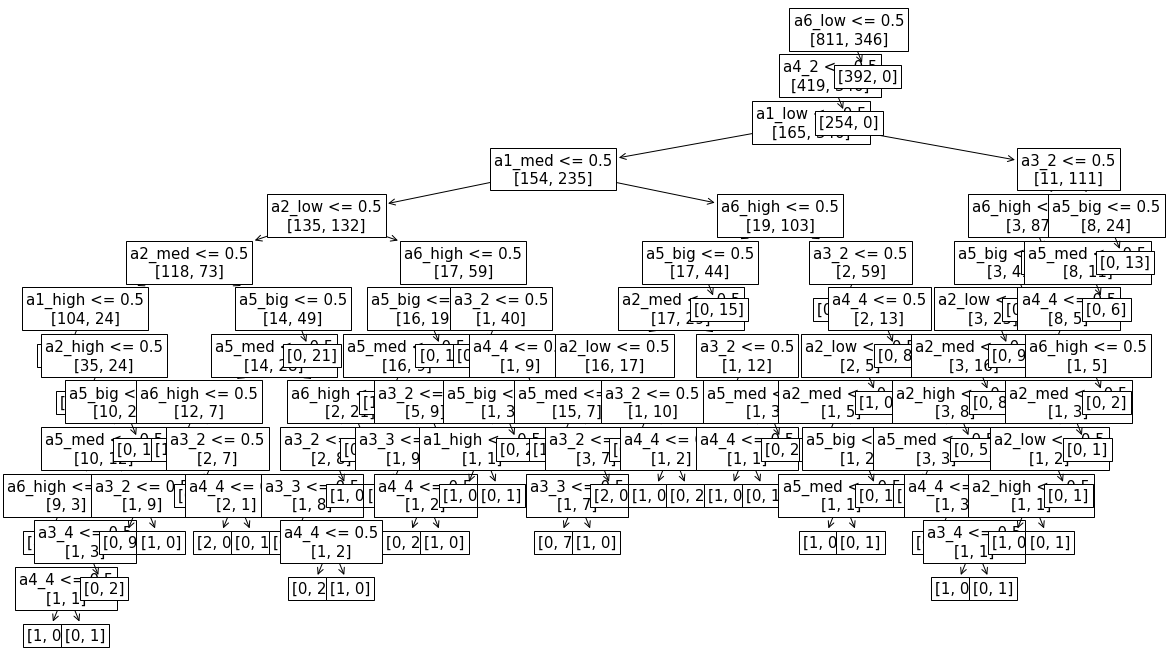

In [7]:
def get_dt_decision_plot(ds_name, version="dt"):
    from plot_utils import plot_tree
    df = pd.read_csv(f"../rsep_explain/datasets/risk_dsets/{ds_name}_data.csv")
    feature_names = df.columns.values.tolist()

    tree = joblib.load(f"../results/{version}_interpret_rob_3/risk_{ds_name}-rminmax-0.pkl")['best_clf']

    plt.figure(figsize=(20, 12))
    plot_tree(tree, feature_names=feature_names, label='none', impurity=False, proportion=False, fontsize=15)
    plt.savefig(f"./{ds_name}_{version}.png")
#get_dt_decision_plot("bank", "dt")
#get_dt_decision_plot("bank", "robdt")
get_dt_decision_plot("careval", "dt")


57

In [20]:
from scipy.spatial import distance_matrix

#X, y = auto_var.get_var_with_argument("dataset", "risk_adult", base_dir="../")
X, y = auto_var.get_var_with_argument("dataset", "risk_compasbin", base_dir="../")
pdist = distance_matrix(X, X, p=np.inf)

In [21]:
(pdist == 0).sum(1).argmax()

4

In [22]:
ind = np.where(pdist[4] == 0)[0]

In [23]:
np.bincount(y[ind]+1)

array([310,   0, 542])

In [24]:
X[4]

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1])

In [ ]:
X